<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection and Analysis of different algorithms.

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
plt.style.use('dark_background')


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Logistic Regression And SVM Implementation

## Creating Dataset For Training

In [3]:
datalr = []
pathslr = []
resultlr = []
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            pathslr.append(os.path.join(r, file))
for path in pathslr:
    img = Image.open(path)
    gray_image = ImageOps.grayscale(img)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224, 3)):
        nsamples, nx, ny = img.shape
        img = img.reshape((nsamples,nx*ny))
        datalr.append(np.array(img))
        resultlr.append(0)
pathslr = []
print('yes', len(datalr), len(resultlr))
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            pathslr.append(os.path.join(r, file))
for path in pathslr:
    img = Image.open(path)
    gray_image = ImageOps.grayscale(img)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224, 3)):
        nsamples, nx, ny = img.shape
        img = img.reshape((nsamples,nx*ny))
        datalr.append(np.array(img))
        resultlr.append(1)
print('no', len(datalr), len(resultlr))

yes 1424 1424
no 2891 2891


In [4]:
datalr = np.array(datalr)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))

In [5]:
print(len(datalr), len(resultlr))

2891 2891


In [6]:
from sklearn.model_selection import train_test_split
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

2168 723


## Logistic Regression

Logistic Regression is not taking all the data set into consideration.

In [7]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100000)

In [8]:
logisticRegr.fit(x_trainlr, y_trainlr)

LogisticRegression(max_iter=100000)

In [9]:
y_test_pred = logisticRegr.predict(x_testlr)
y_train_pred = logisticRegr.predict(x_trainlr)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testlr,y_test_pred)

0.970954356846473

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testlr,y_test_pred)
cm

array([[360,  15],
       [  6, 342]])

## SVM

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Linear Kernels
# Polynomial Kernels
# Radial Basis Function Kernel
svr = SVC(kernel = 'linear',C = 1000)
svr.fit(x_trainlr,y_trainlr)

SVC(C=1000, kernel='linear')

In [15]:
y_test_pred = svr.predict(x_testlr)
y_train_pred = svr.predict(x_trainlr)

In [16]:
accuracy_score(y_testlr,y_test_pred)

0.9695712309820194

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testlr,y_test_pred)
print(len(x_trainlr), len(x_testlr), len(y_test_pred))
cm

2168 723 723


array([[360,  15],
       [  7, 341]])

# Neural Network Implementation:- VGG16, VGG19

In [18]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


# 0 - Tumor
# 1 - Normal
# This cell updates result list for images with tumor

data = []
paths = []
result = []
data_for_svm = []
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
paths = []
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [28]:
data = np.array(data)
data.shape

(2891, 224, 224, 3)

In [29]:
result = np.array(result)
result = result.reshape(2891,2)

In [30]:
model1 = Sequential()
model1.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=2, activation="softmax"))

from tensorflow.keras.optimizers import Adam 
opt = Adam(lr=0.001)
model1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
from keras.models import Sequential
model2.add(Flatten())
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation= 'relu'))
model2.add(Dense(1000, activation= 'relu'))
model2.add(Dense(2, activation='softmax'))
from tensorflow.keras.optimizers import Adam 
opt = Adam(lr=0.001)
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [25]:
y_train = np.array(y_train)
y_train.shape

(1734, 1, 2)

In [33]:
history1 = model1.fit(x_train, y_train, epochs = 70, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/70
44/44 [==============================] - 27s 624ms/step - loss: 0.2338 - accuracy: 0.9043 - val_loss: 0.6417 - val_accuracy: 0.8166
Epoch 2/70
44/44 [==============================] - 27s 624ms/step - loss: 0.2748 - accuracy: 0.8945 - val_loss: 0.2861 - val_accuracy: 0.8858
Epoch 3/70
44/44 [==============================] - 27s 618ms/step - loss: 0.2158 - accuracy: 0.9175 - val_loss: 0.2596 - val_accuracy: 0.9083
Epoch 4/70
44/44 [==============================] - 27s 620ms/step - loss: 0.2116 - accuracy: 0.9146 - val_loss: 0.2666 - val_accuracy: 0.9048
Epoch 5/70
44/44 [==============================] - 27s 624ms/step - loss: 0.1454 - accuracy: 0.9493 - val_loss: 0.2250 - val_accuracy: 0.9256
Epoch 6/70
44/44 [==============================] - 27s 622ms/step - loss: 0.1142 - accuracy: 0.9567 - val_loss: 0.2068 - val_accuracy: 0.9412
Epoch 7/70
44/44 [==============================] - 27s 621ms/step - loss: 0.0907 - accuracy: 0.9671 - val_loss: 0.2488 - val_accuracy: 0.9360

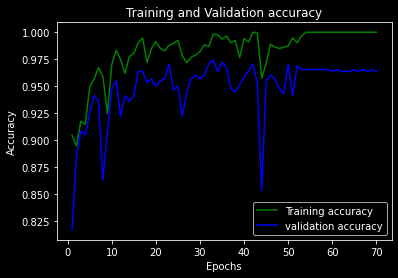

In [35]:
# print(history)
loss_train1 = history1.history['accuracy']
loss_val1 = history1.history['val_accuracy']
epochs = range(1,71)
plt.plot(epochs, loss_train1, 'g', label='Training accuracy')
plt.plot(epochs, loss_val1, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
print("Evaluate on test data")
results1 = model1.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results1)

Evaluate on test data
10/10 [==============================] - 8s 345ms/step - loss: 0.7061 - accuracy: 0.9516
test loss, test acc: [0.7060558795928955, 0.951640784740448]


In [37]:
history2 = model2.fit(x_train, y_train, epochs = 70, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/70
44/44 [==============================] - 39s 850ms/step - loss: 197.4061 - accuracy: 0.5260 - val_loss: 0.6888 - val_accuracy: 0.7215
Epoch 2/70
44/44 [==============================] - 37s 847ms/step - loss: 0.6245 - accuracy: 0.6805 - val_loss: 0.5433 - val_accuracy: 0.7284
Epoch 3/70
44/44 [==============================] - 37s 849ms/step - loss: 0.5598 - accuracy: 0.7284 - val_loss: 0.5359 - val_accuracy: 0.7266
Epoch 4/70
44/44 [==============================] - 37s 848ms/step - loss: 0.4929 - accuracy: 0.7687 - val_loss: 0.4626 - val_accuracy: 0.7907
Epoch 5/70
44/44 [==============================] - 37s 850ms/step - loss: 0.4598 - accuracy: 0.7872 - val_loss: 0.4389 - val_accuracy: 0.8062
Epoch 6/70
44/44 [==============================] - 37s 848ms/step - loss: 0.4553 - accuracy: 0.7964 - val_loss: 0.5351 - val_accuracy: 0.7907
Epoch 7/70
44/44 [==============================] - 37s 848ms/step - loss: 0.4334 - accuracy: 0.7907 - val_loss: 0.4854 - val_accuracy: 0.79

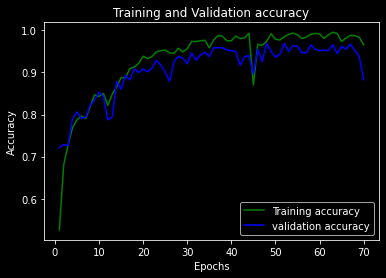

In [39]:
loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']
epochs = range(1,71)
plt.plot(epochs, loss_train2, 'g', label='Training accuracy')
plt.plot(epochs, loss_val2, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
print("Evaluate on test data")
results2 = model2.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results2)

Evaluate on test data
10/10 [==============================] - 4s 348ms/step - loss: 0.2679 - accuracy: 0.9119
test loss, test acc: [0.26794302463531494, 0.9119170904159546]


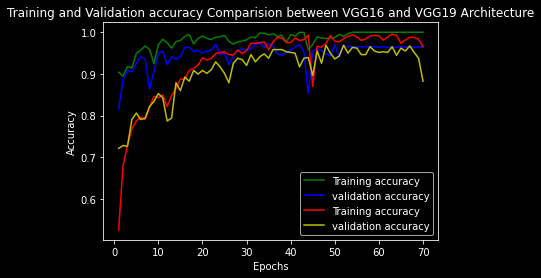

In [41]:
loss_train1 = history1.history['accuracy']
loss_val1 = history1.history['val_accuracy']
epochs = range(1,71)
plt.plot(epochs, loss_train1, 'g', label='Training accuracy')
plt.plot(epochs, loss_val1, 'b', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']
plt.plot(epochs, loss_train2, 'r', label='Training accuracy')
plt.plot(epochs, loss_val2, 'y', label='validation accuracy')
plt.title('Training and Validation accuracy Comparision between VGG16 and VGG19 Architecture')
plt.legend()
plt.show()

In [42]:
def load_weights(var_list, weights_file):
    with open(weights_file, "rb") as fp:
        _ = np.fromfile(fp, dtype=np.int32, count=5)        
        weights = np.fromfile(fp, dtype=np.float32)

# Important Links:-

[SVM](https://towardsdatascience.com/svm-support-vector-machine-for-classification-710a009f6873) 

[Early Stopping Neural Network](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)